In [31]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [32]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [33]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [34]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [35]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14488\3601434573.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [36]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [37]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [38]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [39]:
# Find the most recent date in the data set. Method 1
dates_list = []
for date_row in session.query(Measurement.date).all():
    dates_list.append(date_row)

dates_df = pd.DataFrame(dates_list)
dates_df.sort_values
print(dates_df.max())

date    2017-08-23
dtype: object


In [40]:
# Find the most recent date in the data set. Method 2
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [41]:
# Calculate the date 1 year ago from the last data point in the database
date_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(date_year_ago)

2016-08-23


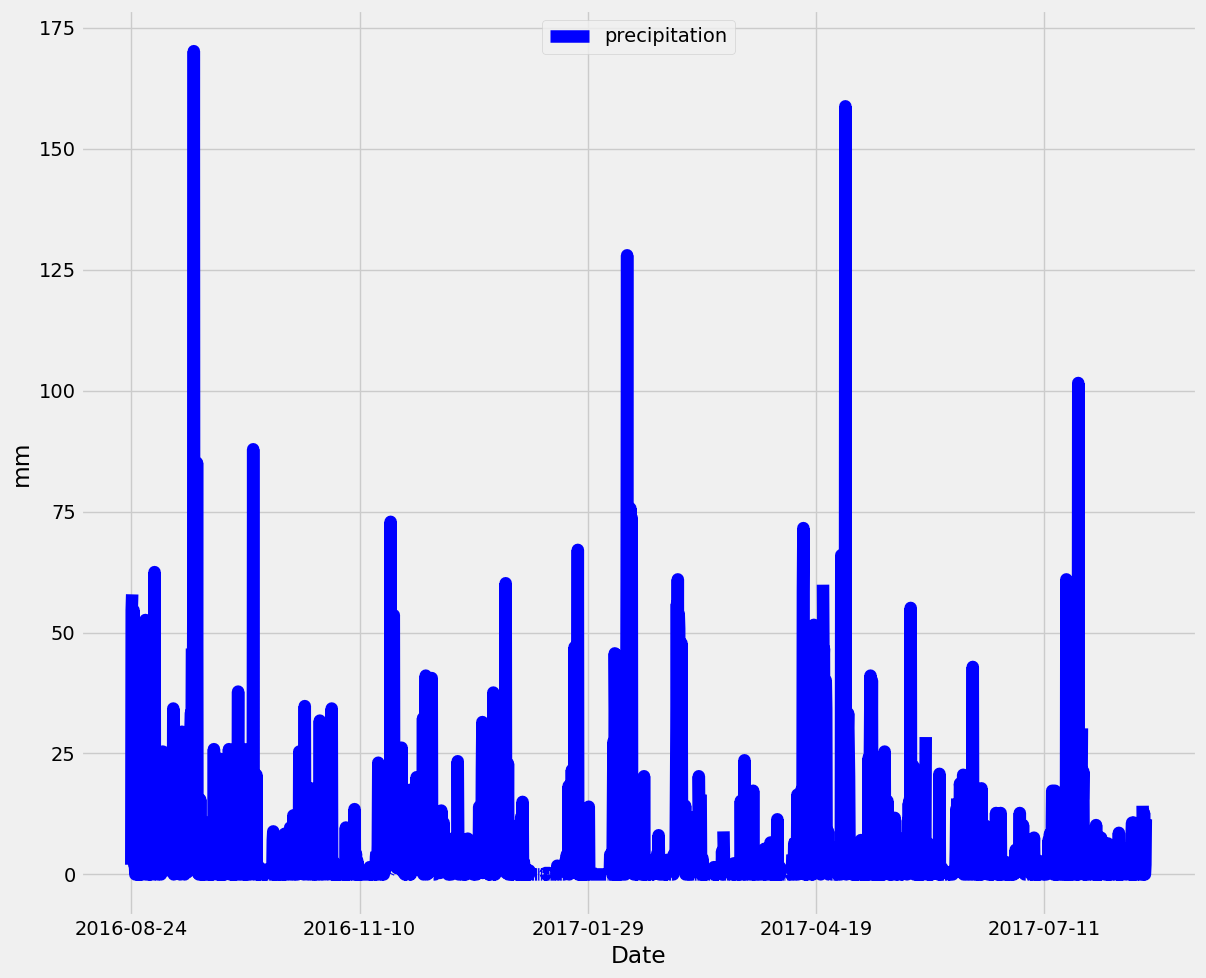

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
date_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_score = session.query(Measurement.date,Measurement.prcp). order_by(Measurement.date.asc()).filter(Measurement.date > date_year_ago).all()
precip_score

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_score_df = pd.DataFrame(precip_score)
precip_score_df = precip_score_df.rename(columns={"prcp":"precipitation"})


# Sort the dataframe by date
precip_score_df.sort_values(by='date')
precip_score_df.set_index('date',inplace=True)
precip_score_df.head

# Use Pandas Plotting with Matplotlib to plot the data
precip_plot=precip_score_df.plot(color='b',figsize=(12,10),legend=True,linewidth=9.0,grid=True)

precip_plot.legend(loc=9)
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("mm")
plt.show()

In [43]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_score_df.describe()

,precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [45]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
                
session.query(*sel).filter(Measurement.station=='USC00519281').all()

[(12.2, 29.4, 22.03582251082252)]

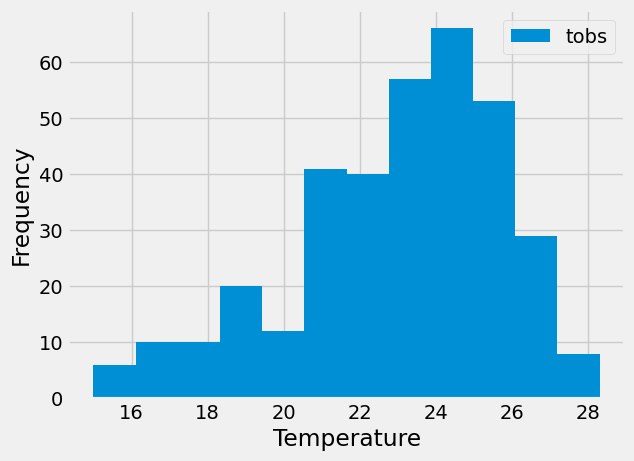

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram = session.query(Measurement.tobs).\
                                filter(Measurement.station=='USC00519281').\
                                filter(Measurement.date >= date_year_ago).\
                                order_by(Measurement.date.desc()).all()

x = [x[0] for x in histogram]


plt.hist(x, bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend(['tobs'])
plt.show()

# Close Session

In [48]:
# Close Session
session.close()
